CSV data:
        Name   Age  Sales
0  Person_1  58.0  761.0
1  Person_2   NaN  587.0
2  Person_3  34.0  201.0
3  Person_4  27.0    NaN
4  Person_5  40.0  765.0

JSON data:
   Department Region
0      Sales  North
1      Sales  South
2  Marketing  North
3         IT   West
4    Finance   East

TXT data:
                                 TextData
0  Kunden er meget tilfreds med servicen
1    Leveringen var forsinket med 2 dage
2               Produktkvaliteten er god
3       Supporten var hurtig og hjælpsom
4                 Prisen er lidt for høj


C:\Users\Lasse\AppData\Local\Temp\ipykernel_17544\4073011908.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_csv["Age"].fillna(df_csv["Age"].mean(), inplace=True)
C:\Users\Lasse\AppData\Local\Temp\ipykernel_17544\4073011908.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

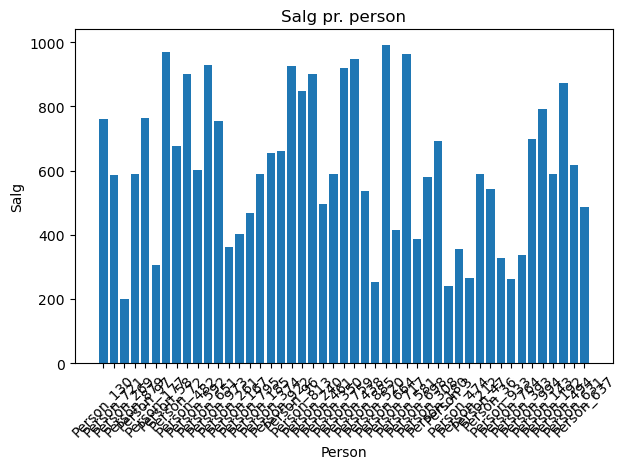

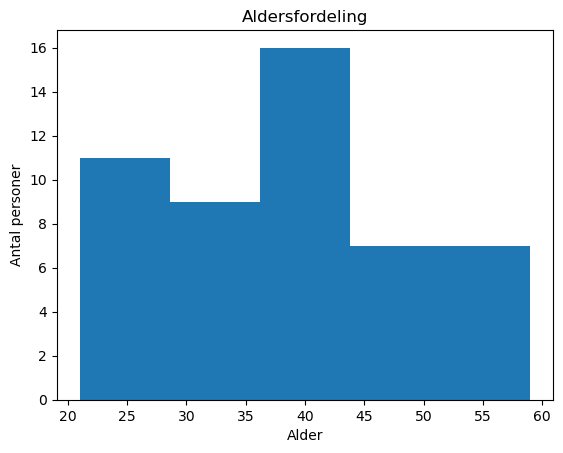

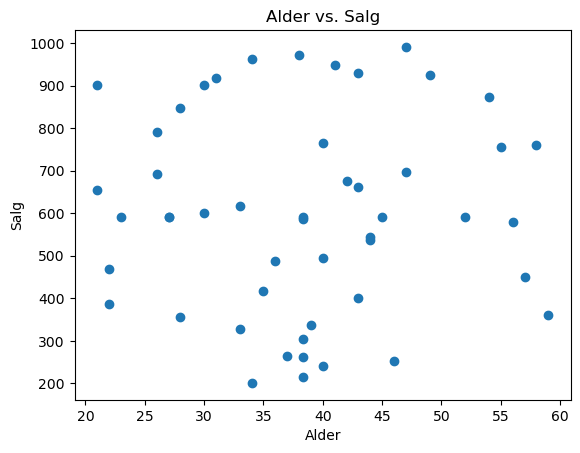

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plot


def load_csv(path):
    return pd.read_csv(path)

def load_json(path):
    return pd.read_json(path)

def load_txt(path):
    with open(path, "r", encoding="utf-8") as f:
        lines = f.read().splitlines()
    return pd.DataFrame(lines, columns=["TextData"])

# Husk at ændre pathen så den passer til filplaseringen. 
csv_path = os.path.expanduser("C:/Users/Lasse/Downloads/data.csv")
json_path = os.path.expanduser("C:/Users/Lasse/Downloads/data.json")
txt_path = os.path.expanduser("C:/Users/Lasse/Downloads/data.txt")

df_csv = load_csv(csv_path)
df_json = load_json(json_path)
df_txt = load_txt(txt_path)

print("CSV data:\n", df_csv.head())
print("\nJSON data:\n", df_json.head())
print("\nTXT data:\n", df_txt.head())


df_csv["Age"].fillna(df_csv["Age"].mean(), inplace=True)
df_csv["Sales"].fillna(df_csv["Sales"].median(), inplace=True)

df_csv["Bonus"] = df_csv["Sales"] * 0.1


# Pseudonymiser navne
df_csv["Name"] = df_csv["Name"].apply(lambda x: "Person_" + str(hash(x) % 1000))


# Bar chart: Salg pr. person
plot.bar(df_csv["Name"], df_csv["Sales"])
plot.title("Salg pr. person")
plot.xlabel("Person")
plot.ylabel("Salg")
plot.xticks(rotation=45)
plot.tight_layout()
plot.show()

# Histogram: Aldersfordeling
plot.hist(df_csv["Age"], bins=5)
plot.title("Aldersfordeling")
plot.xlabel("Alder")
plot.ylabel("Antal personer")
plot.show()

# Scatterplot: Alder vs. Salg
plot.scatter(df_csv["Age"], df_csv["Sales"])
plot.title("Alder vs. Salg")
plot.xlabel("Alder")
plot.ylabel("Salg")
plot.show()
